In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harlfoxem/housesalesprediction")

print("Path to dataset files:", path)

100%|██████████| 780k/780k [00:00<00:00, 64.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/harlfoxem/housesalesprediction/versions/1


In [19]:
# Importando as libs necessárias

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split


In [20]:
# Armazenando dados
csv_path = os.path.join(path, "kc_house_data.csv")

# Carregando DataFrame
df = pd.read_csv(csv_path)

# Exibindo os registros
print(df.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [21]:
# Calculando a correlação de todas as colunas com o preço
correlacoes = df.corr(numeric_only=True)['price'].sort_values(ascending=False)

# Exibindo as correlações
print(correlacoes)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


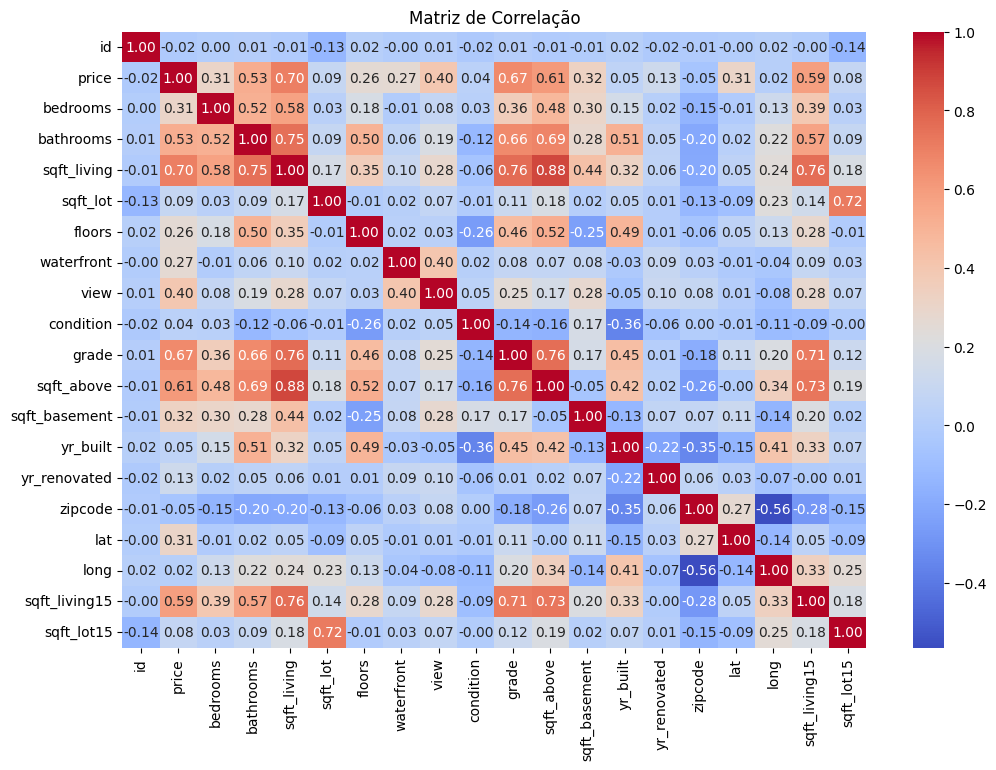

In [22]:
# Matriz de correlação
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

In [26]:
# Seleção de features com boa correlação e baixa multicolinearidade
x = df[['sqft_living', 'grade', 'bathrooms', 'view', 'sqft_above', 'sqft_living15']]
y = df['price']

# Divisão em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Criação do modelo
model = LinearRegression()
model.fit(x_train, y_train)

# Previsões
y_pred = model.predict(x_test)

In [27]:
# Avaliação
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Avaliação do modelo: ")
print(f"R²: {r2:.4f}")
print(f"MSE: {mse:,.2f}")
print(f"MAE: {mae:,.2f}")

Avaliação do modelo: 
R²: 0.5791
MSE: 63,627,402,657.85
MAE: 159,941.26


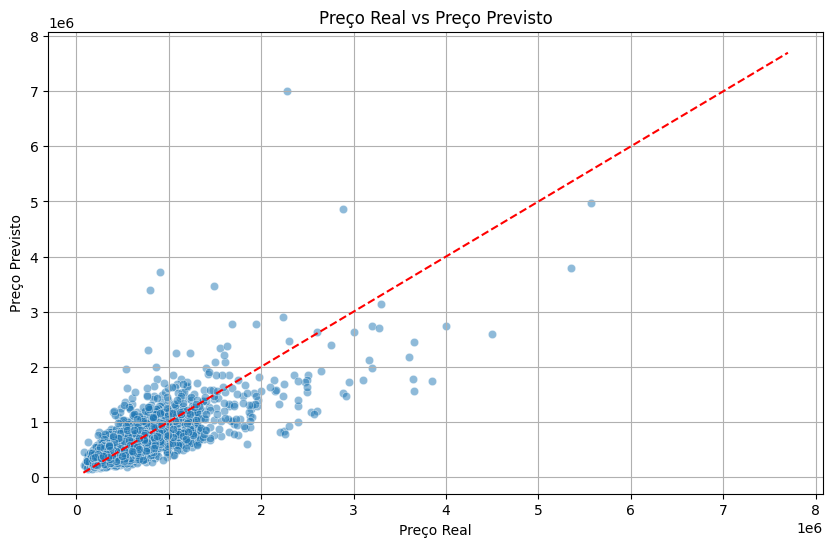

In [35]:
# Plotando previsões vs os valores reais

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')  # Linha de referência
plt.xlabel("Preço Real")
plt.ylabel("Preço Previsto")
plt.title("Preço Real vs Preço Previsto")
plt.grid(True)
plt.show()
